In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("C:/Users/rajpr/Desktop/Prabhat/Machine Learning/BreastCancer_data.csv")
print(data.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [8]:
#data.head()
df = pd.DataFrame(data) 
df.drop(df.columns[[0,32]], axis = 1, inplace = True)
print(df.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [9]:
#count M and B type diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

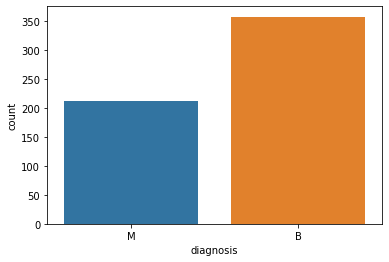

In [10]:
#visualise the count
sns.countplot(df['diagnosis'],label='count')

In [11]:
# here now identify the data type
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [12]:
#Here Encode Categorical Data values
from sklearn.preprocessing import LabelEncoder
LE_Y = LabelEncoder()
df.iloc[:,0] = LE_Y.fit_transform(df.iloc[:,0].values)

df.iloc[:,0]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

C:\Users\rajpr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rajpr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


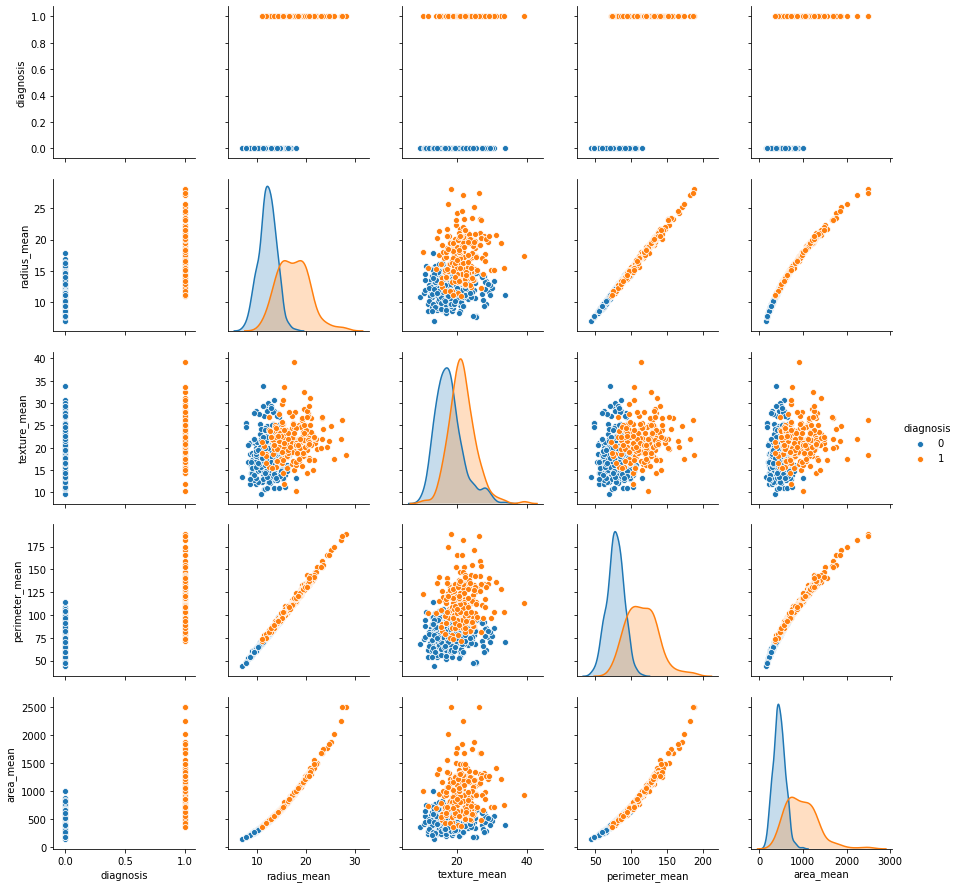

In [13]:
#create pairplot
sns.pairplot(df.iloc[:,0:5], hue = 'diagnosis')

In [14]:
#Here correlation of the columns
df.iloc[:,0:11].corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                1.000000     0.730029      0.415185        0.742636   
radius_mean              0.730029     1.000000      0.323782        0.997855   
texture_mean             0.415185     0.323782      1.000000        0.329533   
perimeter_mean           0.742636     0.997855      0.329533        1.000000   
area_mean                0.708984     0.987357      0.321086        0.986507   
smoothness_mean          0.358560     0.170581     -0.023389        0.207278   
compactness_mean         0.596534     0.506124      0.236702        0.556936   
concavity_mean           0.696360     0.676764      0.302418        0.716136   
concave points_mean      0.776614     0.822529      0.293464        0.850977   
symmetry_mean            0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.012838    -0.311631     -0.076437       -0.261477   

                        area_mean  smoothness_mean  compactness_mean  \
diagnosis                0.708984         0.358560          0.596534   
radius_mean              0.987357         0.170581          0.506124   
texture_mean             0.321086        -0.023389          0.236702   
perimeter_mean           0.986507         0.207278          0.556936   
area_mean                1.000000         0.177028          0.498502   
smoothness_mean          0.177028         1.000000          0.659123   
compactness_mean         0.498502         0.659123          1.000000   
concavity_mean           0.685983         0.521984          0.883121   
concave points_mean      0.823269         0.553695          0.831135   
symmetry_mean            0.151293         0.557775          0.602641   
fractal_dimension_mean  -0.283110         0.584792          0.565369   

                        concavity_mean  concave points_mean  symmetry_mean  \
diagnosis                     0.696360             0.776614       0.330499   
radius_mean                   0.676764             0.822529       0.147741   
texture_mean                  0.302418             0.293464       0.071401   
perimeter_mean                0.716136             0.850977       0.183027   
area_mean                     0.685983             0.823269       0.151293   
smoothness_mean               0.521984             0.553695       0.557775   
compactness_mean              0.883121             0.831135       0.602641   
concavity_mean                1.000000             0.921391       0.500667   
concave points_mean           0.921391             1.000000       0.462497   
symmetry_mean                 0.500667             0.462497       1.000000   
fractal_dimension_mean        0.336783             0.166917       0.479921   

                        fractal_dimension_mean  
diagnosis                            -0.012838  
radius_mean                          -0.311631  
texture_mean                         -0.076437  
perimeter_mean                       -0.261477  
area_mean                            -0.283110  
smoothness_mean                       0.584792  
compactness_mean                      0.565369  
concavity_mean                        0.336783  
concave points_mean                   0.166917  
symmetry_mean                         0.479921  
fractal_dimension_mean                1.000000

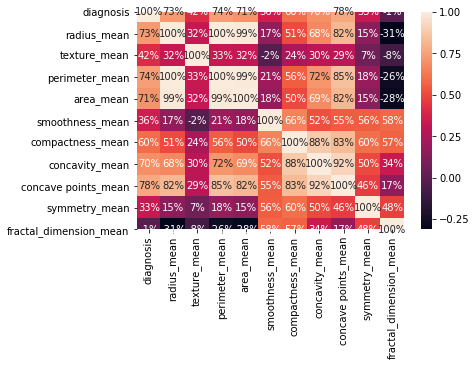

In [15]:
#now visualize the correlation
sns.heatmap(df.iloc[:,0:11].corr(), annot=True, fmt='.0%')

In [19]:
#devide dependsnt and independent variable
X = df.iloc[:,1:31].values
print(X)
Y = df.iloc[:,0].values
#print(Y)
#type(df)
#type(X)
#type(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [18]:
#load the required libraries and split in train test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
#build logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
print('Logistic tregression model training accuracy:',logmodel.score(X_train, Y_train))

Logistic tregression model training accuracy: 0.9906103286384976


C:\Users\rajpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, logmodel.predict(X_test))

#testing accuracy
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Testing accuracy score =',(TP + TN)/(TP + TN + FN + FP))

[[86  4]
 [ 2 51]]
Testing accuracy score = 0.958041958041958


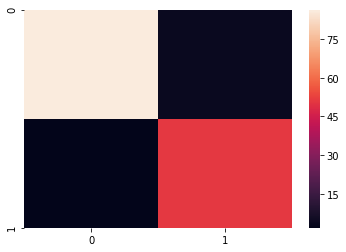

In [24]:
#confusion matrix heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, logmodel.predict(X_test))))
plt.show()

In [25]:
#Here i find the classification report and accuracy score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
print(classification_report(Y_test, logmodel.predict(X_test)))
print(accuracy_score(Y_test, logmodel.predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958
